In [56]:
import numpy as np

phi = (1 + np.sqrt(5)) / 2
angle = np.atan((phi - 1) / (phi + 1))


def spiral_centers(side_length=1, rot=0, n=10):
    """
    Generate the centers of a golden equiangular spiral of squares.

    Returns
    -------
    centers : list[tuple[float, float]]
        The sequence of spiral centers R0, R1, ..., R_{n-1}.
    radii : list[float or None]
        The step radii used to move from R_{i-1} to R_i.
        radii[0] is None (R0 has no incoming step).
    """
    centers = [None] * n
    radii   = [None] * n

    if n <= 0:
        return [], []

    # --------------------------------------------
    # R0: center of the first square
    # --------------------------------------------
    r0 = side_length * np.sqrt(2) / 2
    R0 = np.array([
        r0 * np.cos(np.pi/4 + rot),
        r0 * np.sin(np.pi/4 + rot)
    ])
    centers[0] = tuple(R0)

    if n == 1:
        return centers, radii

    # --------------------------------------------
    # Setup for R1 and subsequent steps
    # --------------------------------------------
    radius = phi / (2 * np.cos(angle))   # r1
    step_theta0 = angle + rot           # direction of the first step

    # clockwise turning: 0, -90°, -180°, -270°
    cw_turns = [i * np.pi / 2 for i in range(5)]

    current = R0
    rad = radius
    radii[1] = rad   # displacement used for R1

    # --------------------------------------------
    # MAIN LOOP: generates R1, R2, ...
    # --------------------------------------------
    for i in range(1, n):
        theta = step_theta0 - cw_turns[(i - 1) % 4]

        dx = rad * np.cos(theta)
        dy = rad * np.sin(theta)

        current = current + np.array([dx, dy])
        centers[i] = tuple(current)

        # shrink radius for NEXT step
        rad /= phi
        if i + 1 < n:
            radii[i + 1] = rad

    return centers, radii


def spiral_diagonals(side_length=1, rot=0, n=10):
    """
    Generate the diagonals of a golden equiangular spiral of squares.

    Returns
    -------
    diagonals : list[tuple[float, float]]
        The sequence of spiral diagonals d0, d1, ..., d_{n-1}.
    """
    c0 = (0, 0)
    r0 = side_length * np.sqrt(2)

    diagonal_points = [c0]
    s = r0
    current = c0
    cw_turns = [i * np.pi / 2 for i in range(5)]
    for i in range(1, n):
        theta0 = np.pi/4 + rot - cw_turns[(i - 1) % 4]
        dx = s * np.cos(theta0)
        dy = s * np.sin(theta0)
        current = current + np.array([dx, dy])
        diagonal_points.append(tuple(current))
        s /= phi
    return diagonal_points
    

R0 = (np.float64(0.5000000000000001), np.float64(0.5))
R1 = (np.float64(1.3090169943749475), np.float64(0.6909830056250525))
radii = [None, np.float64(0.8312538755549068), np.float64(0.5137431483730077), np.float64(0.317510727181899), np.float64(0.19623242119110867), np.float64(0.12127830599079029), np.float64(0.07495411520031839), np.float64(0.0463241907904719), np.float64(0.02862992440984649), np.float64(0.017694266380625406), np.float64(0.010935658029221085), np.float64(0.006758608351404321)]


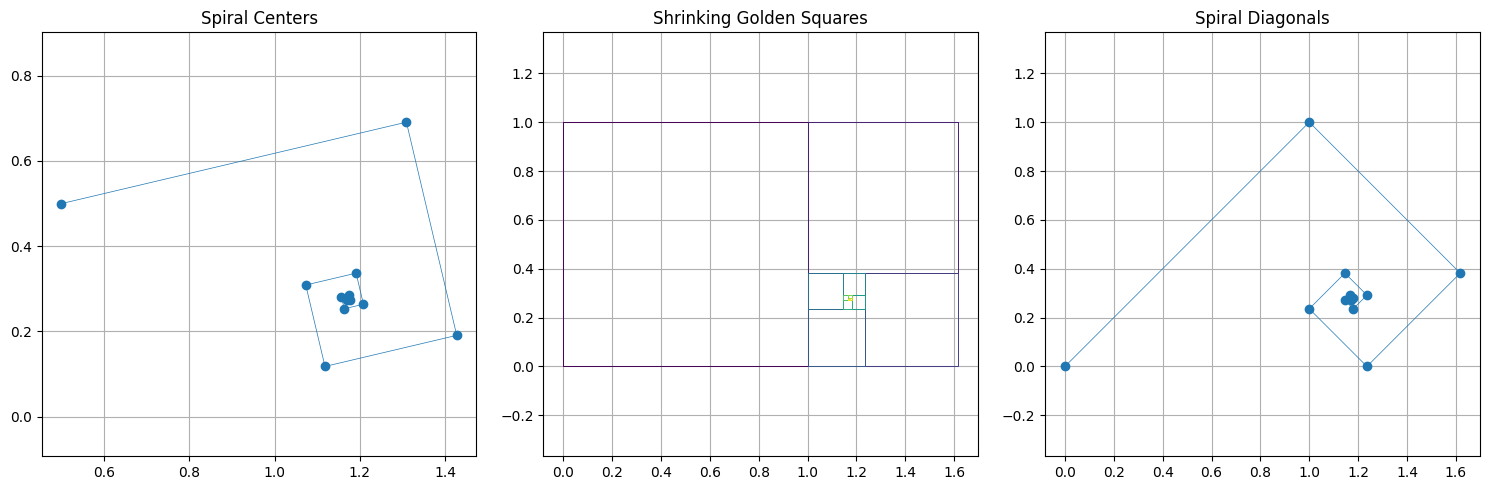

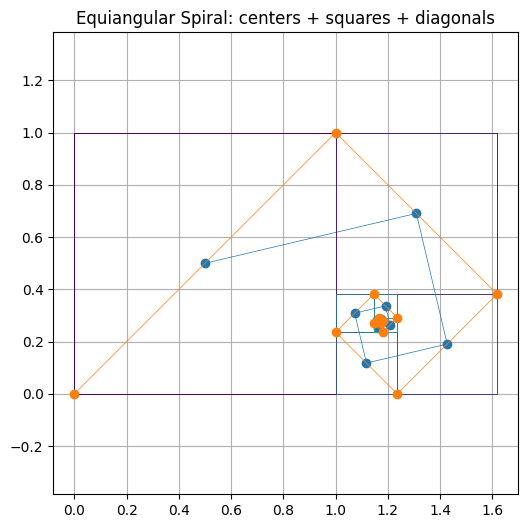

In [57]:

import numpy as np
from matplotlib import pyplot as plt

phi = (1 + np.sqrt(5)) / 2
angle = np.atan((phi - 1) / (phi + 1))

def plot_spiral(centers, ax=None, show=True):
    xs = [c[0] for c in centers]
    ys = [c[1] for c in centers]

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(xs, ys, marker='o', linewidth=0.5)
    ax.set_title("Spiral Centers")
    ax.axis('equal')
    ax.grid(True)

    if show and ax is not None and ax.figure is not None:
        plt.show()


def plot_square(center, side_length=1, rot=0, ax=None, color=None):
    cx, cy = center
    r = side_length * np.sqrt(2) / 2
    theta0 = np.pi/4 + rot

    xs = [cx + r * np.cos(theta0 + i*np.pi/2) for i in range(5)]
    ys = [cy + r * np.sin(theta0 + i*np.pi/2) for i in range(5)]

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    # pass color only if provided, so caller can still rely on defaults
    kwargs = {"linewidth": 0.7}
    if color is not None:
        kwargs["color"] = color

    ax.plot(xs, ys, **kwargs)


def plot_squares(side_length=1, rot=0, n=10, ax=None, show=True, rev=False):
    centers, _ = spiral_centers(side_length, rot, n)

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    # build a color gradient along the sequence of squares
    cmap = plt.cm.viridis        # choose any colormap you like
    t = np.linspace(0, 1, n)     # parameter from 0 → 1
    colors = [cmap(v) for v in t] if not rev else [cmap(v) for v in t[::-1]]

    s = side_length
    for center, c in zip(centers, colors):
        plot_square(center, s, rot, ax=ax, color=c)
        s *= (phi - 1)   # shrink by φ − 1 = 1/φ

    ax.set_title("Shrinking Golden Squares (gradient)")
    ax.axis('equal')
    ax.grid(True)

    if show and ax is not None and ax.figure is not None:
        plt.show()


def plot_spiral_diagonals(side_length=1, rot=0, n=10, ax=None, show=True):
    centers = spiral_diagonals(side_length, rot, n)
    xs = [c[0] for c in centers]
    ys = [c[1] for c in centers]

    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(xs, ys, marker='o', linewidth=0.5)
    ax.set_title("Spiral Diagonals")
    ax.axis('equal')
    ax.grid(True)

    if show and ax is not None and ax.figure is not None:
        plt.show()
    
    
def plot_equiangular_spiral(side_length=1, rot=0, n=10,
                            overlay=False, plot_spiral_fit=False):
    """
    Call:
      - plot_spiral
      - plot_squares
      - plot_spiral_diagonals

    If overlay=False:
        draw them in three subplots in a single figure.

    If overlay=True:
        draw all three on a single overlaid axis.

    If plot_spiral_fit=True:
        also overlay the least-squares equiangular spiral curves
        (for centers and diagonal points) in the x–y plane.
    """
    if not overlay:
        # 1×3 layout, each component on its own axis
        centers, _ = spiral_centers(side_length, rot, n)
        diagonal_points = spiral_diagonals(side_length, rot, n)

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # 1) spiral centers (points)
        plot_spiral(centers, ax=axes[0], show=False)

        # optionally: fitted spiral for centers
        if plot_spiral_fit:
            a_c, b_c, alpha_c, beta_c, theta_c, ln_r_c = fit_equiangular_spiral(centers)
            theta_line = np.linspace(theta_c.min(), theta_c.max(), 400)
            r_line = a_c * np.exp(b_c * theta_line)
            x_line = r_line * np.cos(theta_line)
            y_line = r_line * np.sin(theta_line)
            axes[0].plot(x_line, y_line, linestyle="--")
            axes[0].set_title("Spiral Centers + fit")
        else:
            axes[0].set_title("Spiral Centers")

        # 2) shrinking golden squares
        plot_squares(side_length, rot, n, ax=axes[1], show=False)
        axes[1].set_title("Shrinking Golden Squares")

        # 3) spiral diagonals (points)
        plot_spiral_diagonals(side_length, rot, n, ax=axes[2], show=False)

        # optionally: fitted spiral for diagonal points
        if plot_spiral_fit:
            a_d, b_d, alpha_d, beta_d, theta_d, ln_r_d = fit_equiangular_spiral(diagonal_points)
            theta_line_d = np.linspace(theta_d.min(), theta_d.max(), 400)
            r_line_d = a_d * np.exp(b_d * theta_line_d)
            x_line_d = r_line_d * np.cos(theta_line_d)
            y_line_d = r_line_d * np.sin(theta_line_d)
            axes[2].plot(x_line_d, y_line_d, linestyle="--")
            axes[2].set_title("Spiral Diagonals + fit")
        else:
            axes[2].set_title("Spiral Diagonals")

        # make sure all panels look nice
        for ax in axes:
            ax.axis('equal')
            ax.grid(True)

        plt.tight_layout()
        plt.show()

    else:
        # one unified overlay
        centers, _ = spiral_centers(side_length, rot, n)
        diagonal_points = spiral_diagonals(side_length, rot, n)

        fig, ax = plt.subplots(figsize=(6, 6))

        # all three drawings share the same axis (no show inside)
        plot_spiral(centers, ax=ax, show=False)
        plot_squares(side_length, rot, n, ax=ax, show=False)
        plot_spiral_diagonals(side_length, rot, n, ax=ax, show=False)

        if plot_spiral_fit:
            # centers spiral fit
            a_c, b_c, alpha_c, beta_c, theta_c, ln_r_c = fit_equiangular_spiral(centers)
            theta_line = np.linspace(theta_c.min(), theta_c.max(), 400)
            r_line = a_c * np.exp(b_c * theta_line)
            x_line = r_line * np.cos(theta_line)
            y_line = r_line * np.sin(theta_line)
            ax.plot(x_line, y_line, linestyle="--")

            # diagonal spiral fit
            a_d, b_d, alpha_d, beta_d, theta_d, ln_r_d = fit_equiangular_spiral(diagonal_points)
            theta_line_d = np.linspace(theta_d.min(), theta_d.max(), 400)
            r_line_d = a_d * np.exp(b_d * theta_line_d)
            x_line_d = r_line_d * np.cos(theta_line_d)
            y_line_d = r_line_d * np.sin(theta_line_d)
            ax.plot(x_line_d, y_line_d, linestyle=":")

            ax.set_title("Equiangular Spiral: centers + squares + diagonals + fits")
        else:
            ax.set_title("Equiangular Spiral: centers + squares + diagonals")

        ax.axis('equal')
        ax.grid(True)
        plt.show()
       
centers, radii = spiral_centers(side_length=1, rot=0, n=12) 
diagonal_points = spiral_diagonals(side_length=1, rot=0, n=12)    
print("R0 =", centers[0])
print("R1 =", centers[1])
# plot_spiral(centers)
print("radii =", radii)
# three separate figures
plot_equiangular_spiral(side_length=1, rot=0, n=12, overlay=False)

# everything overlayed on one plot
plot_equiangular_spiral(side_length=1, rot=0, n=12, overlay=True)

Centers spiral:
  ln r ≈ 0.351644 + -0.655064 * θ
  r ≈ 1.421402 * exp(-0.655064 * θ)
  residual sum of squares (centers): 2.073049e-01

Per-point residuals (centers):
       theta      ln_r  ln_r_fit  residual  residual_sq
0   0.785398 -0.346574 -0.162842 -0.183731     0.033757
1   0.485690  0.392175  0.033486  0.358689     0.128658
2   0.133040  0.364486  0.264494  0.099992     0.009998
3   0.105183  0.117114  0.282742 -0.165628     0.027433
4   0.280418  0.110254  0.167952 -0.057697     0.003329
5   0.275658  0.213264  0.171070  0.042194     0.001780
6   0.215071  0.212443  0.210758  0.001685     0.000003
7   0.214419  0.174271  0.211185 -0.036914     0.001363
8   0.238472  0.174142  0.195429 -0.021287     0.000453
9   0.238375  0.188899  0.195493 -0.006594     0.000043
10  0.229321  0.188880  0.201424 -0.012543     0.000157
11  0.229307  0.183269  0.201433 -0.018164     0.000330

Diagonal spiral:
  ln r ≈ 0.169070 + 0.195363 * θ
  r ≈ 1.184203 * exp(0.195363 * θ)
  residual sum of 

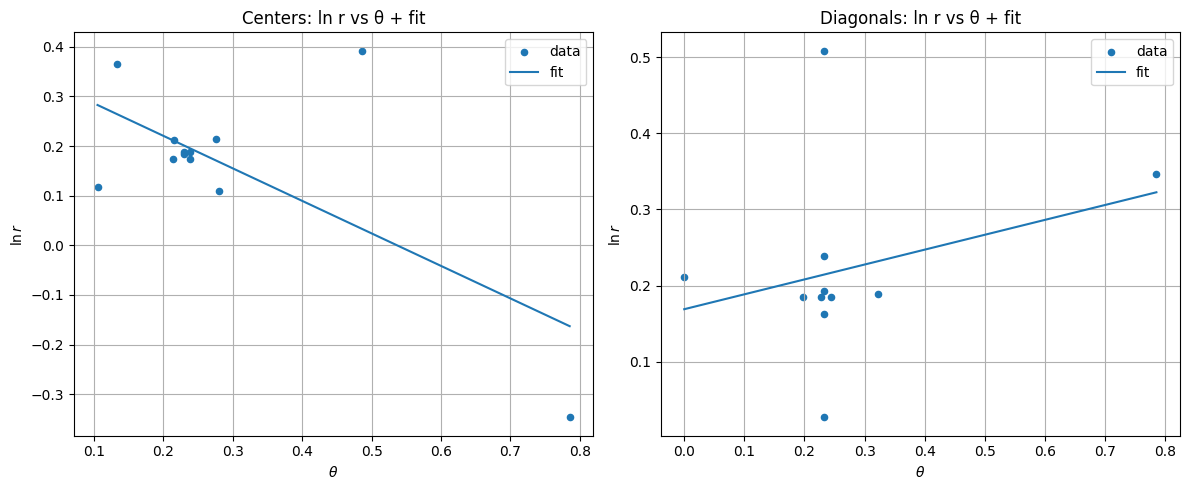

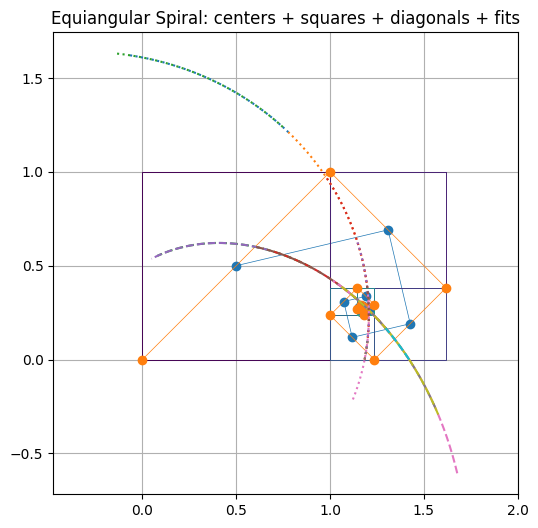

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

phi = (1 + np.sqrt(5)) / 2
angle = np.atan((phi - 1) / (phi + 1))

def clip_to_rotated_rectangle(x, y, rot, width=1.0, height=phi, rect_center=(0.0, 0.0)):
    """
    Keep only those (x, y) points that lie inside the rectangle of size
    `width`×`height` centered at rect_center and rotated by `rot` CCW.
    """
    x = np.asarray(x)
    y = np.asarray(y)

    cx, cy = rect_center
    xr = x - cx
    yr = y - cy

    # rotate points back by -rot to align with axis-aligned rectangle
    cos_r = np.cos(-rot)
    sin_r = np.sin(-rot)
    u = cos_r * xr - sin_r * yr
    v = sin_r * xr + cos_r * yr

    half_w = width / 2.0
    half_h = height / 2.0
    mask = (np.abs(u) <= half_w) & (np.abs(v) <= half_h)

    return x[mask], y[mask]

def fit_equiangular_spiral(points):
    """
    Fit r = a * exp(b * theta) to a list of (x, y) points using
    a linear model on ln r and solving by QR factorization.

    Uses a pandas DataFrame to hold/parse the data.

    Model:
        ln r ≈ alpha + beta * theta

    Returns
    -------
    a, b        : float
        Spiral parameters such that r ≈ a * exp(b * theta).
    alpha, beta : float
        Linear model parameters ln r ≈ alpha + beta * theta.
    df          : pd.DataFrame
        DataFrame with columns:
            x, y, r, theta, ln_r, ln_r_fit, residual, residual_sq
            (r == 0 rows removed).
    sse         : float
        Sum of squared residuals, Σ e_i^2.
    """
    # --- build DataFrame from input points ---
    points = np.asarray(points, dtype=float)
    df = pd.DataFrame(points, columns=["x", "y"])

    # polar coordinates
    df["r"] = np.sqrt(df["x"]**2 + df["y"]**2)
    df["theta"] = np.arctan2(df["y"], df["x"])

    # unwrap theta to keep it monotone-ish
    df["theta"] = np.unwrap(df["theta"].values)

    # remove r == 0 (log undefined)
    df = df[df["r"] > 0].copy()

    # response
    df["ln_r"] = np.log(df["r"])

    # Design matrix A: [1, theta]
    theta = df["theta"].to_numpy()
    y = df["ln_r"].to_numpy()
    A = np.column_stack([np.ones_like(theta), theta])

    # --- QR factorization (lm-style OLS) ---
    Q, R = np.linalg.qr(A, mode="reduced")
    Qt_y = Q.T @ y
    coeffs = np.linalg.solve(R, Qt_y)
    alpha, beta = coeffs

    # Back to multiplicative spiral parameters
    a = np.exp(alpha)
    b = beta

    # Predicted ln r and residuals
    ln_r_fit = A @ coeffs
    residuals = y - ln_r_fit
    residual_sq = residuals**2
    sse = float(residual_sq.sum())

    # store in DataFrame
    df["ln_r_fit"] = ln_r_fit
    df["residual"] = residuals
    df["residual_sq"] = residual_sq

    return a, b, alpha, beta, df, sse


def plot_spiral_fit(theta, ln_r, alpha, beta, ax, title):
    """
    Plot ln r vs theta with least-squares fit line.
    """
    ax.scatter(theta, ln_r, s=20, label="data")

    theta_line = np.linspace(theta.min(), theta.max(), 200)
    ln_r_line = alpha + beta * theta_line
    ax.plot(theta_line, ln_r_line, linewidth=1.5, label="fit")

    ax.set_title(title)
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel(r"$\ln r$")
    ax.grid(True)
    ax.legend()


def plot_spiral_regressions(side_length=1, rot=0, n=12):
    # generate data
    centers, _ = spiral_centers(side_length=side_length, rot=rot, n=n)
    diagonal_points = spiral_diagonals(side_length=side_length, rot=rot, n=n)

    # fit spirals (now get DataFrames)
    a_c, b_c, alpha_c, beta_c, df_c, sse_c = fit_equiangular_spiral(centers)
    a_d, b_d, alpha_d, beta_d, df_d, sse_d = fit_equiangular_spiral(diagonal_points)

    print("Centers spiral:")
    print(f"  ln r ≈ {alpha_c:.6f} + {beta_c:.6f} * θ")
    print(f"  r ≈ {a_c:.6f} * exp({b_c:.6f} * θ)")
    print(f"  residual sum of squares (centers): {sse_c:.6e}")
    print("\nPer-point residuals (centers):")
    print(df_c[["theta", "ln_r", "ln_r_fit", "residual", "residual_sq"]])

    print("\nDiagonal spiral:")
    print(f"  ln r ≈ {alpha_d:.6f} + {beta_d:.6f} * θ")
    print(f"  r ≈ {a_d:.6f} * exp({b_d:.6f} * θ)")
    print(f"  residual sum of squares (diagonals): {sse_d:.6e}")
    print("\nPer-point residuals (diagonals):")
    print(df_d[["theta", "ln_r", "ln_r_fit", "residual", "residual_sq"]])

    # plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    plot_spiral_fit(
        df_c["theta"].to_numpy(),
        df_c["ln_r"].to_numpy(),
        alpha_c, beta_c,
        ax=axes[0],
        title="Centers: ln r vs θ + fit"
    )

    plot_spiral_fit(
        df_d["theta"].to_numpy(),
        df_d["ln_r"].to_numpy(),
        alpha_d, beta_d,
        ax=axes[1],
        title="Diagonals: ln r vs θ + fit"
    )

    plt.tight_layout()
    plt.show()


# Example usage
centers, radii = spiral_centers(side_length=1, rot=0, n=12)
diagonal_points = spiral_diagonals(side_length=1, rot=0, n=12)

plot_spiral_regressions(side_length=1, rot=0, n=12)

# overlay everything on one axis, with fitted spirals
plot_equiangular_spiral(
    side_length=1,
    rot=0,
    n=12,
    overlay=True,
    plot_spiral_fit=True
)

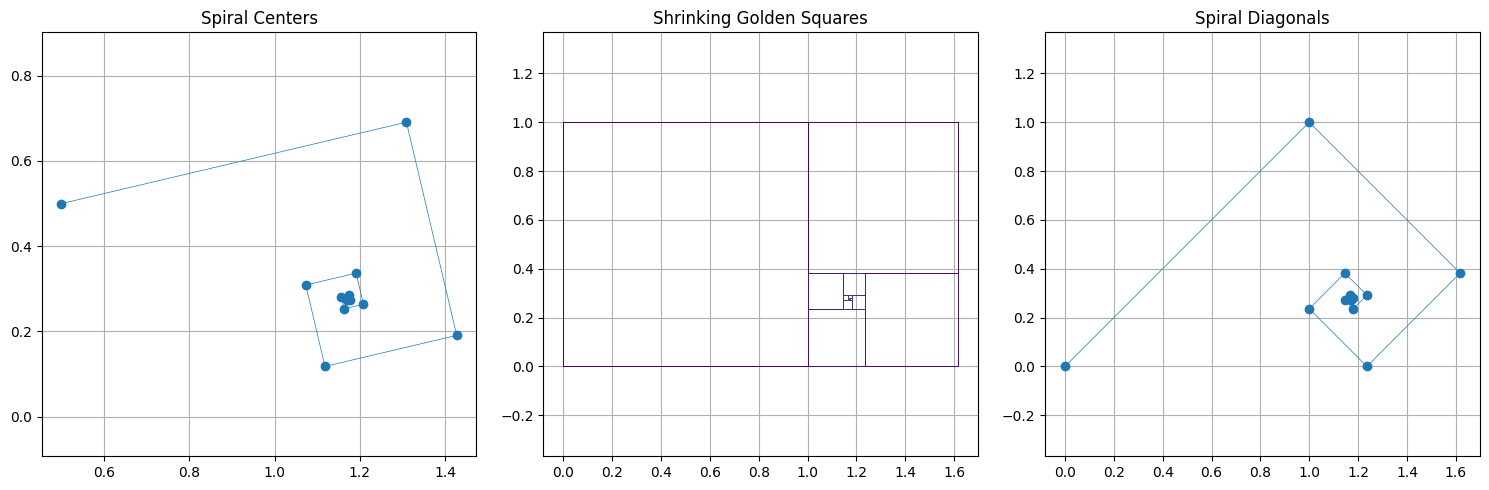

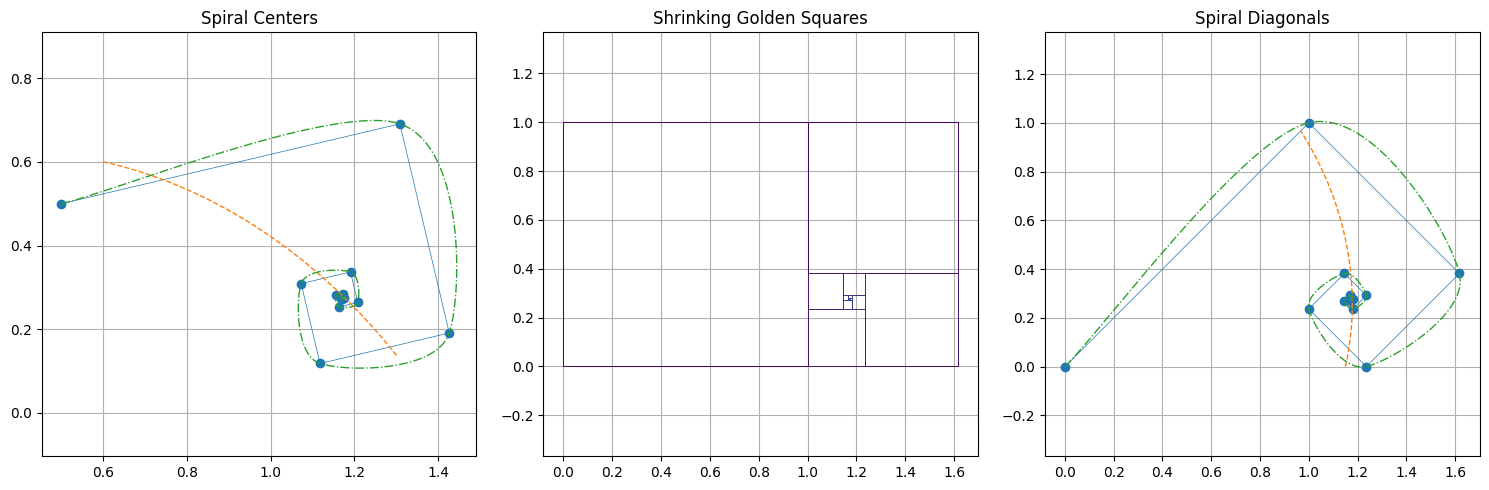

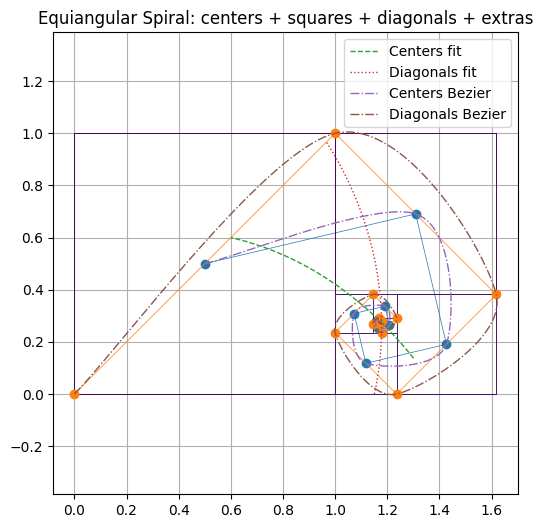

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

phi = (1 + np.sqrt(5)) / 2
angle = np.atan((phi - 1) / (phi + 1))

num_points = 50


# ----------------- rectangle clipping helper -----------------

def clip_to_rotated_rectangle(x, y, rot, domain_points, padding=0.0):
    """
    Clip (x, y) points to the minimal rotated rectangle that bounds
    `domain_points`, optionally enlarged by `padding`.

    Parameters
    ----------
    x, y : array-like
        Coordinates of the curve to be clipped.
    rot : float
        Rotation angle (radians), CCW, used to define the local frame.
    domain_points : array-like of shape (m, 2)
        Points that define the domain; the bounding box in the rotated
        frame of these points will be used as the clipping rectangle.
    padding : float
        Extra margin added to half-width and half-height in the rotated frame.

    Returns
    -------
    x_clipped, y_clipped : np.ndarray
        Points of the curve that lie inside the rotated bounding rectangle.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    pts = np.asarray(domain_points, dtype=float)

    # --- 1. Compute bounding box of domain_points in the rotated frame ---

    # rotate by -rot to align rectangle with axes
    cos_m = np.cos(-rot)
    sin_m = np.sin(-rot)

    u_dom = cos_m * pts[:, 0] - sin_m * pts[:, 1]
    v_dom = sin_m * pts[:, 0] + cos_m * pts[:, 1]

    u_min, u_max = u_dom.min(), u_dom.max()
    v_min, v_max = v_dom.min(), v_dom.max()

    half_w = (u_max - u_min) / 2.0 + padding
    half_h = (v_max - v_min) / 2.0 + padding

    # center of the rectangle in the rotated frame
    u_c = (u_max + u_min) / 2.0
    v_c = (v_max + v_min) / 2.0

    # map rectangle center back to global coordinates
    cos_r = np.cos(rot)
    sin_r = np.sin(rot)
    cx = cos_r * u_c - sin_r * v_c
    cy = sin_r * u_c + cos_r * v_c

    # --- 2. Clip curve points (x, y) to that rotated rectangle ---

    xr = x - cx
    yr = y - cy

    # rotate curve points into the same local (u, v) frame
    u = cos_m * xr - sin_m * yr
    v = sin_m * xr + cos_m * yr

    mask = (np.abs(u) <= half_w) & (np.abs(v) <= half_h)

    return x[mask], y[mask]


# ----------------- spiral least-squares fit (pandas) -----------------

def fit_equiangular_spiral(points):
    """
    Fit r = a * exp(b * theta) to a list of (x, y) points using
    a linear model on ln r and solving by QR factorization.

    Uses a pandas DataFrame to hold/parse the data.

    Model:
        ln r ≈ alpha + beta * theta

    Returns
    -------
    a, b        : float
        Spiral parameters such that r ≈ a * exp(b * theta).
    alpha, beta : float
        Linear model parameters ln r ≈ alpha + beta * theta.
    df          : pd.DataFrame
        DataFrame with columns:
            x, y, r, theta, ln_r, ln_r_fit, residual, residual_sq
            (r == 0 rows removed).
    sse         : float
        Sum of squared residuals, Σ e_i^2.
    """
    points = np.asarray(points, dtype=float)
    df = pd.DataFrame(points, columns=["x", "y"])

    # polar coordinates
    df["r"] = np.sqrt(df["x"]**2 + df["y"]**2)
    df["theta"] = np.arctan2(df["y"], df["x"])
    df["theta"] = np.unwrap(df["theta"].values)

    # remove r == 0
    df = df[df["r"] > 0].copy()

    df["ln_r"] = np.log(df["r"])
    theta = df["theta"].to_numpy()
    y = df["ln_r"].to_numpy()

    A = np.column_stack([np.ones_like(theta), theta])

    Q, R = np.linalg.qr(A, mode="reduced")
    Qt_y = Q.T @ y
    coeffs = np.linalg.solve(R, Qt_y)
    alpha, beta = coeffs

    a = np.exp(alpha)
    b = beta

    ln_r_fit = A @ coeffs
    residuals = y - ln_r_fit
    residual_sq = residuals**2
    sse = float(residual_sq.sum())

    df["ln_r_fit"] = ln_r_fit
    df["residual"] = residuals
    df["residual_sq"] = residual_sq

    return a, b, alpha, beta, df, sse


# ----------------- Bezier interpolation via Catmull–Rom -----------------

def bezier_from_catmull_rom(points, samples_per_seg=40):
    """
    Build a smooth Bezier-interpolated curve through a polyline
    using Catmull–Rom → cubic Bezier conversion.
    """
    pts = np.asarray(points, dtype=float)
    n = len(pts)
    if n < 2:
        return (pts[:, 0], pts[:, 1]) if n == 1 else (np.array([]), np.array([]))

    curves_x = []
    curves_y = []

    def eval_bezier(P0, P1, P2, P3, t):
        t = t[:, None]  # (N,1)
        return ((1 - t)**3) * P0 + \
               (3 * (1 - t)**2 * t) * P1 + \
               (3 * (1 - t) * t**2) * P2 + \
               (t**3) * P3

    for i in range(n - 1):
        i0 = max(i - 1, 0)
        i1 = i
        i2 = i + 1
        i3 = min(i + 2, n - 1)

        P0 = pts[i0]
        P1 = pts[i1]
        P2 = pts[i2]
        P3 = pts[i3]

        B0 = P1
        B3 = P2
        B1 = P1 + (P2 - P0) / 6.0
        B2 = P2 - (P3 - P1) / 6.0

        t_vals = np.linspace(0.0, 1.0, samples_per_seg, endpoint=(i == n - 2))
        curve = eval_bezier(B0, B1, B2, B3, t_vals)
        curves_x.append(curve[:, 0])
        curves_y.append(curve[:, 1])

    xs = np.concatenate(curves_x)
    ys = np.concatenate(curves_y)
    return xs, ys


# ----------------- main plot routine -----------------
# (assuming spiral_centers, spiral_diagonals, plot_spiral, plot_squares, plot_spiral_diagonals exist)

def plot_equiangular_spiral(side_length=1, rot=0, n=10,
                            overlay=False,
                            plot_spiral_fit=False,
                            plot_bezier=False):
    """
    Visualize:
      - centers spiral,
      - shrinking golden squares,
      - diagonal spiral,
    with optional fitted equiangular spirals and Bezier interpolants.

    If overlay=False:
        draw them in three subplots.

    If overlay=True:
        draw all three on a single overlaid axis.

    If plot_spiral_fit=True:
        overlay least-squares equiangular spiral curves in x–y,
        clipped to the rotated 1×φ rectangle.

    If plot_bezier=True:
        overlay Bezier-interpolated curves through centers and diagonal points.
    """
    if not overlay:
        centers, _ = spiral_centers(side_length, rot, n)
        diagonal_points = spiral_diagonals(side_length, rot, n)

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # 1) spiral centers (points)
        plot_spiral(centers, ax=axes[0], show=False)

        if plot_spiral_fit:
            a_c, b_c, alpha_c, beta_c, df_c, sse_c = fit_equiangular_spiral(centers)
            theta_c = df_c["theta"].to_numpy()
            theta_line = np.linspace(theta_c.min(), theta_c.max(), 400)
            r_line = np.exp(alpha_c + beta_c * theta_line)
            x_line = r_line * np.cos(theta_line)
            y_line = r_line * np.sin(theta_line)

            x_line, y_line = clip_to_rotated_rectangle(
                x_line, y_line,
                rot=rot,
                domain_points=centers,
                padding=0.0
            )
            axes[0].plot(x_line, y_line, linestyle="--", linewidth=1.0)

        if plot_bezier:
            bx, by = bezier_from_catmull_rom(centers, samples_per_seg=40)
            axes[0].plot(bx, by, linestyle="-.", linewidth=1.0)

        axes[0].set_title("Spiral Centers")
        axes[0].axis('equal')
        axes[0].grid(True)

        # 2) shrinking golden squares
        plot_squares(side_length, rot, n, ax=axes[1], show=False)
        axes[1].set_title("Shrinking Golden Squares")
        axes[1].axis('equal')
        axes[1].grid(True)

        # 3) spiral diagonals (points)
        plot_spiral_diagonals(side_length, rot, n, ax=axes[2], show=False)

        if plot_spiral_fit:
            a_d, b_d, alpha_d, beta_d, df_d, sse_d = fit_equiangular_spiral(diagonal_points)
            theta_d = df_d["theta"].to_numpy()
            theta_line_d = np.linspace(theta_d.min(), theta_d.max(), 400)
            r_line_d = np.exp(alpha_d + beta_d * theta_line_d)
            x_d = r_line_d * np.cos(theta_line_d)
            y_d = r_line_d * np.sin(theta_line_d)

            x_d, y_d = clip_to_rotated_rectangle(
                x_d, y_d,
                rot=rot,
                domain_points=diagonal_points,
                padding=0.0
            )
            axes[2].plot(x_d, y_d, linestyle="--", linewidth=1.0)

        if plot_bezier:
            bdx, bdy = bezier_from_catmull_rom(diagonal_points, samples_per_seg=40)
            axes[2].plot(bdx, bdy, linestyle="-.", linewidth=1.0)

        axes[2].set_title("Spiral Diagonals")
        axes[2].axis('equal')
        axes[2].grid(True)

        plt.tight_layout()
        plt.show()

    else:
        centers, _ = spiral_centers(side_length, rot, n)
        diagonal_points = spiral_diagonals(side_length, rot, n)

        fig, ax = plt.subplots(figsize=(6, 6))

        # base drawings
        plot_spiral(centers, ax=ax, show=False)
        plot_squares(side_length, rot, n, ax=ax, show=False)
        plot_spiral_diagonals(side_length, rot, n, ax=ax, show=False)

        if plot_spiral_fit:
            # centers fit
            a_c, b_c, alpha_c, beta_c, df_c, sse_c = fit_equiangular_spiral(centers)
            theta_c = df_c["theta"].to_numpy()
            theta_line = np.linspace(theta_c.min(), theta_c.max(), 400)
            r_line = np.exp(alpha_c + beta_c * theta_line)
            x_line = r_line * np.cos(theta_line)
            y_line = r_line * np.sin(theta_line)
            x_line, y_line = clip_to_rotated_rectangle(
                x_line, y_line,
                rot=rot,
                domain_points=centers,
                padding=0.0
            )
            ax.plot(x_line, y_line, linestyle="--", linewidth=1.0, label="Centers fit")

            # diagonal fit
            a_d, b_d, alpha_d, beta_d, df_d, sse_d = fit_equiangular_spiral(diagonal_points)
            theta_d = df_d["theta"].to_numpy()
            theta_line_d = np.linspace(theta_d.min(), theta_d.max(), 400)
            r_line_d = np.exp(alpha_d + beta_d * theta_line_d)
            x_d = r_line_d * np.cos(theta_line_d)
            y_d = r_line_d * np.sin(theta_line_d)
            x_d, y_d = clip_to_rotated_rectangle(
                x_d, y_d,
                rot=rot,
                domain_points=diagonal_points,
                padding=0.0
            )
            ax.plot(x_d, y_d, linestyle=":", linewidth=1.0, label="Diagonals fit")

        if plot_bezier:
            bx, by = bezier_from_catmull_rom(centers, samples_per_seg=40)
            ax.plot(bx, by, linestyle="-.", linewidth=1.0, label="Centers Bezier")

            bdx, bdy = bezier_from_catmull_rom(diagonal_points, samples_per_seg=40)
            ax.plot(bdx, bdy, linestyle="-.", linewidth=1.0, label="Diagonals Bezier")

        title = "Equiangular Spiral: centers + squares + diagonals"
        if plot_spiral_fit or plot_bezier:
            title += " + extras"
        ax.set_title(title)

        ax.axis('equal')
        ax.grid(True)
        ax.legend(loc="best")
        plt.show()


# ----------------- example calls -----------------

# Plain three-panel view
plot_equiangular_spiral(side_length=1, rot=0, n=num_points)

# With fitted spirals and Bezier
plot_equiangular_spiral(side_length=1, rot=0, n=num_points,
                        overlay=False,
                        plot_spiral_fit=True,
                        plot_bezier=True)

# Single overlaid canvas
plot_equiangular_spiral(side_length=1, rot=0, n=num_points,
                        overlay=True,
                        plot_spiral_fit=True,
                        plot_bezier=True)


Branch 1 (global indices [1, 5, 9]):
  ln r ≈ 0.098826 + 0.313485 * θ
  SSE = 2.056400e-04
  Per-point residuals:
      theta      ln_r  ln_r_fit  residual  residual_sq
0  0.785398  0.346574  0.345036  0.001537     0.000002
1  0.321751  0.188869  0.199690 -0.010821     0.000117
2  0.244979  0.184907  0.175623  0.009284     0.000086

Branch 2 (global indices [2, 6, 10]):
  ln r ≈ 0.313432 + 0.000000 * θ
  SSE = 5.804038e-02
  Per-point residuals:
      theta      ln_r  ln_r_fit  residual  residual_sq
0  0.231824  0.508327  0.313432  0.194895     0.037984
1  0.231824  0.239051  0.313432 -0.074381     0.005533
2  0.231824  0.192918  0.313432 -0.120514     0.014524

Branch 3 (global indices [3, 7, 11]):
  ln r ≈ 0.211721 + -0.124901 * θ
  SSE = 4.850233e-06
  Per-point residuals:
      theta      ln_r  ln_r_fit  residual   residual_sq
0  0.000000  0.211935  0.211721  0.000214  4.594511e-08
1  0.197396  0.185413  0.187066 -0.001653  2.733564e-06
2  0.226799  0.184833  0.183394  0.001439  2

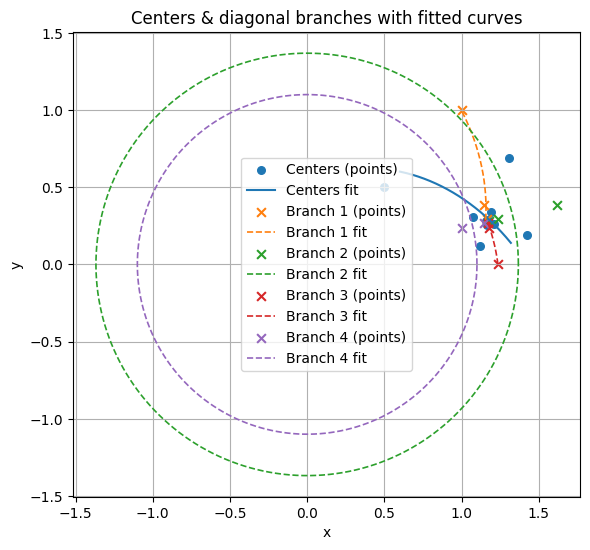

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

phi = (1 + np.sqrt(5)) / 2

# ---- 1. Split diagonal_points into 4 branches ----

def split_diagonal_branches(diagonal_points):
    """
    Split diagonal_points into 4 subsequences according to the CW pattern:
        branch 0: indices 1, 5, 9, ...
        branch 1: indices 2, 6, 10, ...
        branch 2: indices 3, 7, 11, ...
        branch 3: indices 4, 8, 12, ...
    (index 0 (origin) is ignored)
    """
    pts = list(diagonal_points)
    branches = []
    original_indices = []

    for offset in range(1, 5):   # 1,2,3,4
        branch_pts = []
        idx_list = []
        for i in range(offset, len(pts), 4):
            branch_pts.append(pts[i])
            idx_list.append(i)
        if branch_pts:
            branches.append(np.array(branch_pts, dtype=float))
            original_indices.append(np.array(idx_list, dtype=int))

    return branches, original_indices


# ---- 2. Fit ln r ~ theta on a single branch with a DataFrame ----

def fit_branch_ln_r_theta(points, eps=1e-10):
    """
    Fit ln r ≈ alpha + beta * theta for a single branch.

    If all theta are (numerically) equal, then the design matrix is rank-1
    and beta is not identifiable. In that case, we set:
        beta = 0
        alpha = mean(ln r)
    and compute residuals accordingly.

    Returns
    -------
    alpha, beta : float
    df          : DataFrame with columns x, y, r, theta, ln_r, ln_r_fit, residual, residual_sq
    sse         : float, sum of squared residuals
    """
    points = np.asarray(points, dtype=float)
    df = pd.DataFrame(points, columns=["x", "y"])

    # polar
    df["r"] = np.sqrt(df["x"]**2 + df["y"]**2)
    df["theta"] = np.arctan2(df["y"], df["x"])
    df["theta"] = np.unwrap(df["theta"].values)

    # remove r == 0 just in case
    df = df[df["r"] > 0].copy()

    df["ln_r"] = np.log(df["r"])
    theta = df["theta"].to_numpy()
    y = df["ln_r"].to_numpy()

    # check variance of theta
    if np.var(theta) < eps:
        # degenerate case: all theta ≈ constant
        beta = 0.0
        alpha = float(np.mean(y))
        ln_r_fit = np.full_like(y, alpha)
    else:
        # genuine 2-parameter regression via QR
        A = np.column_stack([np.ones_like(theta), theta])
        Q, R = np.linalg.qr(A, mode="reduced")
        Qt_y = Q.T @ y
        coeffs = np.linalg.solve(R, Qt_y)
        alpha, beta = coeffs
        ln_r_fit = A @ coeffs

    residuals = y - ln_r_fit
    residual_sq = residuals**2
    sse = float(residual_sq.sum())

    df["ln_r_fit"] = ln_r_fit
    df["residual"] = residuals
    df["residual_sq"] = residual_sq

    return alpha, beta, df, sse


# ---- 3. Run the fit on all four diagonal branches ----

def fit_diagonal_branches(diagonal_points):
    branches, idx_lists = split_diagonal_branches(diagonal_points)

    results = []
    for k, (branch_pts, idxs) in enumerate(zip(branches, idx_lists), start=1):
        # ensure Python ints in the printed list
        idxs_python = [int(i) for i in idxs]

        alpha, beta, df_branch, sse = fit_branch_ln_r_theta(branch_pts)
        results.append((alpha, beta, df_branch, sse))

        print(f"\nBranch {k} (global indices {idxs_python}):")
        print(f"  ln r ≈ {alpha:.6f} + {beta:.6f} * θ")
        print(f"  SSE = {sse:.6e}")
        print("  Per-point residuals:")
        print(df_branch[['theta', 'ln_r', 'ln_r_fit', 'residual', 'residual_sq']])

    return results


# ---- 4. Plot centers + diagonal branches + their fitted curves on ONE graph ----

def plot_centers_and_branch_fits(centers, center_results, branch_results):
    """
    Plot:
      - center points and their fitted spiral curve
      - diagonal branch points and their fitted curves
    all on a single axis with labels.
    """
    fig, ax = plt.subplots(figsize=(6, 6))

    # ---- centers ----
    centers = np.asarray(centers, dtype=float)
    ax.scatter(centers[:, 0], centers[:, 1],
               s=30, marker='o', label="Centers (points)")

    alpha_c, beta_c, df_c, sse_c = center_results
    a_c = np.exp(alpha_c)

    theta_c = df_c["theta"].to_numpy()
    theta_line_c = np.linspace(theta_c.min(), theta_c.max(), 400)
    r_line_c = np.exp(alpha_c + beta_c * theta_line_c)
    x_line_c = r_line_c * np.cos(theta_line_c)
    y_line_c = r_line_c * np.sin(theta_line_c)

    ax.plot(x_line_c, y_line_c,
            linewidth=1.5, label="Centers fit")

    # ---- branches ----
    colors = ["tab:orange", "tab:green", "tab:red", "tab:purple"]
    for j, (res, col) in enumerate(zip(branch_results, colors), start=1):
        alpha_b, beta_b, df_b, sse_b = res
        x_b = df_b["x"].to_numpy()
        y_b = df_b["y"].to_numpy()
        theta_b = df_b["theta"].to_numpy()

        # scatter branch points
        ax.scatter(x_b, y_b, s=40, marker='x',
                   color=col, label=f"Branch {j} (points)")

        # draw fitted curve:
        if np.var(theta_b) < 1e-10:
            # degenerate case: circle of radius exp(alpha_b)
            r0 = np.exp(alpha_b)
            theta_line_b = np.linspace(0, 2*np.pi, 400)
            x_fit_b = r0 * np.cos(theta_line_b)
            y_fit_b = r0 * np.sin(theta_line_b)
        else:
            theta_line_b = np.linspace(theta_b.min(), theta_b.max(), 400)
            r_fit_b = np.exp(alpha_b + beta_b * theta_line_b)
            x_fit_b = r_fit_b * np.cos(theta_line_b)
            y_fit_b = r_fit_b * np.sin(theta_line_b)

        ax.plot(x_fit_b, y_fit_b,
                linewidth=1.2, color=col,
                linestyle='--', label=f"Branch {j} fit")

    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.set_title("Centers & diagonal branches with fitted curves")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.tight_layout()
    plt.show()


# ---- 5. Example usage (assuming spiral_centers / spiral_diagonals exist) ----

num_points = 12  # or whatever you like
centers, radii = spiral_centers(side_length=1, rot=0, n=num_points)
diagonal_points = spiral_diagonals(side_length=1, rot=0, n=num_points)

branch_results = fit_diagonal_branches(diagonal_points)
center_results = fit_branch_ln_r_theta(centers)

df_center = center_results[2]
print("Center results:")
print(df_center[['theta', 'ln_r', 'ln_r_fit', 'residual', 'residual_sq']])

# one graph with everything
plot_centers_and_branch_fits(centers, center_results, branch_results)

In [10]:

import numpy as np

# vertices
points = {
    "A": (0, 0, 0),
    "B": (0, 0, 1),
    "C": (0, 1, 0),
    "D": (0, 1, 1),
    "E": (1, 0, 0),
    "F": (1, 0, 1),
    "G": (1, 1, 0),
    "H": (1, 1, 1)
}

# faces (your mapping idea, just with labels D/U/L/R/F/B)
# note: these sets correspond to axis-aligned faces in the initial cube:
#   - D/U: x = 0 / x = 1
#   - L/R: y = 0 / y = 1
#   - F/B: z = 0 / z = 1
surfaces = {
    "D": {"A", "B", "C", "D"},  # x = 0
    "U": {"E", "F", "G", "H"},  # x = 1
    "L": {"A", "B", "E", "F"},  # y = 0
    "R": {"C", "D", "G", "H"},  # y = 1
    "F": {"A", "C", "E", "G"},  # z = 0
    "B": {"B", "D", "F", "H"}   # z = 1
}

# For completeness (not used in the spin, but consistent with surfaces)
point_surfaces = {
    "A": {"D", "L", "F"},
    "B": {"D, ", "L", "B"},
    "C": {"D", "R", "F"},
    "D": {"D", "R", "B"},
    "E": {"U", "L", "F"},
    "F": {"U", "L", "B"},
    "G": {"U", "R", "F"},
    "H": {"U", "R", "B"}
}

def rotation(point, rotation_mode, theta):
    """Rotate a single 3D point about x, y, or z by angle theta (radians)."""
    x, y, z = point
    c = np.cos(theta)
    s = np.sin(theta)

    if rotation_mode == "x":
        new_y = c * y - s * z
        new_z = s * y + c * z
        return (x, new_y, new_z)
    elif rotation_mode == "y":
        new_x = c * x + s * z
        new_z = -s * x + c * z
        return (new_x, y, new_z)
    elif rotation_mode == "z":
        new_x = c * x - s * y
        new_y = s * x + c * y
        return (new_x, new_y, z)
    else:
        raise ValueError(f"Unknown rotation_mode: {rotation_mode!r}")


def rotation_op(pts, rotation_mode, deg):
    """
    Apply a rotation to *all* points in a mapping {label: (x,y,z)}.

    pts : dict[str, tuple]
    rotation_mode: 'x', 'y', or 'z'
    deg: angle in degrees (snapped to multiples of 90°)
    """
    theta = np.deg2rad(deg)
    if theta not in [np.pi / 2, np.pi, 3 * np.pi / 2]:
        theta = np.round(theta / (np.pi / 2)) * (np.pi / 2)  # snap to k * 90°

    new_pts = {}
    for label, coord in pts.items():
        new_pts[label] = rotation(coord, rotation_mode, theta)
    return new_pts

def face_centroid(pts, vertex_labels):
    """Centroid of a face given a dict of point coords and a set of vertex labels."""
    coords = np.array([pts[v] for v in vertex_labels], dtype=float)
    return coords.mean(axis=0)


def classify_face_direction(direction_vec, eps=1e-9):
    """
    Given a direction vector from cube center to face centroid,
    return which orientation label it corresponds to: D/U/L/R/F/B.
    """
    x, y, z = direction_vec
    vec = np.array([x, y, z], dtype=float)

    # if it's extremely close to zero, something is wrong
    if np.linalg.norm(vec) < eps:
        raise ValueError("Direction vector too small to classify")

    # dominant axis index: 0 -> x, 1 -> y, 2 -> z
    axis = int(np.argmax(np.abs(vec)))
    sign = np.sign(vec[axis])

    if axis == 0:  # x-axis
        return "U" if sign > 0 else "D"
    elif axis == 1:  # y-axis
        return "R" if sign > 0 else "L"
    else:  # axis == 2, z-axis
        return "B" if sign > 0 else "F"
    
def perform_spin(operations):
    """
    operations: list of (rotation_mode, deg), e.g.
        [("x", 90), ("y", 90), ("z", 90)]

    Returns
    -------
    face_map : dict[str, str]
        Maps original face label -> new orientation label
        (each value in {"D", "U", "L", "R", "F", "B"}).
    """
    # Start from original vertices
    pts = points.copy()

    # Apply all rotations in order
    for mode, deg in operations:
        pts = rotation_op(pts, mode, deg)

    # Center of the rotated cube
    all_coords = np.array(list(pts.values()), dtype=float)
    cube_center = all_coords.mean(axis=0)

    face_map = {}

    # For each original face label, find where it ended up (which orientation)
    for face_label, vert_labels in surfaces.items():
        centroid = face_centroid(pts, vert_labels)
        direction_vec = centroid - cube_center
        new_label = classify_face_direction(direction_vec)
        face_map[face_label] = new_label

    return face_map

operations = [("x", 90), ("y", 90), ("z", 90)]
surface_map = perform_spin(operations)

for origin, destination in surface_map.items():
    print(f"{origin} -> {destination}")

D -> B
U -> F
L -> L
R -> R
F -> D
B -> U


In [13]:
import numpy as np

# ------------------------
# 1. Cube geometry & adjacency
# ------------------------

points = {
    "A": (0, 0, 0),
    "B": (0, 0, 1),
    "C": (0, 1, 0),
    "D": (0, 1, 1),
    "E": (1, 0, 0),
    "F": (1, 0, 1),
    "G": (1, 1, 0),
    "H": (1, 1, 1)
}

# Faces: D/U along x, L/R along y, F/B along z
surfaces = {
    "D": {"A", "B", "C", "D"},  # x = 0
    "U": {"E", "F", "G", "H"},  # x = 1
    "L": {"A", "B", "E", "F"},  # y = 0
    "R": {"C", "D", "G", "H"},  # y = 1
    "F": {"A", "C", "E", "G"},  # z = 0
    "B": {"B", "D", "F", "H"}   # z = 1
}

# Vertex → (original) faces it belongs to
point_surfaces = {
    "A": {"D", "L", "F"},
    "B": {"D", "L", "B"},
    "C": {"D", "R", "F"},
    "D": {"D", "R", "B"},
    "E": {"U", "L", "F"},
    "F": {"U", "L", "B"},
    "G": {"U", "R", "F"},
    "H": {"U", "R", "B"}
}

# Canonical face normals in the initial orientation
face_normals = {
    "D": np.array([-1.0,  0.0,  0.0]),  # x-
    "U": np.array([ 1.0,  0.0,  0.0]),  # x+
    "L": np.array([ 0.0, -1.0,  0.0]),  # y-
    "R": np.array([ 0.0,  1.0,  0.0]),  # y+
    "F": np.array([ 0.0,  0.0, -1.0]),  # z-
    "B": np.array([ 0.0,  0.0,  1.0])   # z+
}

canonical_axes = {
    "D": np.array([-1.0,  0.0,  0.0]),
    "U": np.array([ 1.0,  0.0,  0.0]),
    "L": np.array([ 0.0, -1.0,  0.0]),
    "R": np.array([ 0.0,  1.0,  0.0]),
    "F": np.array([ 0.0,  0.0, -1.0]),
    "B": np.array([ 0.0,  0.0,  1.0])
}

# ------------------------
# 2. Rodrigues rotation formula & matrix construction
# ------------------------

def rodrigues(axis, theta):
    """
    Rodrigues’ rotation formula: build 3×3 rotation matrix for
    rotation by angle theta around unit vector 'axis'.
    """
    axis = np.asarray(axis, dtype=float)
    axis = axis / np.linalg.norm(axis)

    kx, ky, kz = axis
    K = np.array([
        [0,   -kz,  ky],
        [kz,   0,  -kx],
        [-ky,  kx,  0 ]
    ], dtype=float)

    I = np.eye(3)
    c = np.cos(theta)
    s = np.sin(theta)

    R = I * c + (1 - c) * np.outer(axis, axis) + s * K
    return R


def rotation_matrix_from_ops(operations):
    """
    operations: list of (axis_label, degrees), e.g.
        [("x", 90), ("y", 90), ("z", 90)]

    Returns:
        R_total: 3×3 rotation matrix for the combined rotation.
    """
    axis_vectors = {
        "x": np.array([1.0, 0.0, 0.0]),
        "y": np.array([0.0, 1.0, 0.0]),
        "z": np.array([0.0, 0.0, 1.0])
    }

    R_total = np.eye(3)
    for axis_label, deg in operations:
        theta = np.deg2rad(deg)
        # snap to multiples of 90° for exact cube rotations
        theta = np.round(theta / (np.pi / 2)) * (np.pi / 2)
        axis_vec = axis_vectors[axis_label]
        R = rodrigues(axis_vec, theta)
        # apply this rotation after previous ones: v' = R @ v
        R_total = R @ R_total

    return R_total

# ------------------------
# 3. Face permutation from rotation matrix
# ------------------------

def classify_normal_as_face(normal, eps=1e-6):
    """
    Given a rotated normal vector, classify it as one of D/U/L/R/F/B
    by comparing to the canonical axes.
    """
    n = np.asarray(normal, dtype=float)
    if np.linalg.norm(n) < eps:
        raise ValueError("Normal too small to classify")

    n_unit = n / np.linalg.norm(n)

    best_label = None
    best_dot = -np.inf
    for label, axis in canonical_axes.items():
        d = float(np.dot(n_unit, axis))
        if d > best_dot:
            best_dot = d
            best_label = label

    return best_label


def face_permutation_from_R(R):
    """
    Given a 3×3 rotation matrix R, compute the permutation of faces:
        original_label -> new_oriented_label
    using rotated normals.
    """
    face_map = {}
    for face_label, n0 in face_normals.items():
        n_rot = R @ n0
        new_label = classify_normal_as_face(n_rot)
        face_map[face_label] = new_label
    return face_map

# ------------------------
# 4. Vertex–surface mapping under rotation
# ------------------------

def rotate_points_with_R(R):
    """
    Rotate all cube vertices around the cube center (0.5,0.5,0.5)
    using rotation matrix R.

    Returns:
        dict: vertex_label -> rotated (x,y,z) coordinates
    """
    center = np.array([0.5, 0.5, 0.5], dtype=float)
    new_points = {}
    for label, coord in points.items():
        v = np.array(coord, dtype=float)
        v_centered = v - center
        v_rot = R @ v_centered + center
        new_points[label] = tuple(v_rot)
    return new_points


def vertex_surface_orientation(face_map):
    """
    Using the original vertex→surface adjacency (point_surfaces)
    and the face permutation 'face_map', compute which *oriented* faces
    each vertex belongs to after rotation.

    Returns:
        dict: vertex_label -> set of oriented face labels
    """
    vmap = {}
    for vertex, faces in point_surfaces.items():
        # each original face in this set is now mapped by face_map
        new_faces = {face_map[f] for f in faces}
        vmap[vertex] = new_faces
    return vmap

# ------------------------
# 5. Putting it together
# ------------------------

def apply_cube_rotation(operations):
    """
    High-level wrapper:

    operations: list of (axis_label, degrees), e.g.
        [("x", 90), ("y", 90), ("z", 90)]

    Returns:
        R_total           : 3×3 rotation matrix
        new_points        : dict[vertex_label -> rotated coords]
        face_map          : dict[original face -> oriented face label]
        vertex_face_map   : dict[vertex_label -> set of oriented faces]
    """
    R = rotation_matrix_from_ops(operations)
    new_pts = rotate_points_with_R(R)
    face_map = face_permutation_from_R(R)
    vertex_face_map = vertex_surface_orientation(face_map)
    return R, new_pts, face_map, vertex_face_map

# ------------------------
# 6. Example usage
# ------------------------

if __name__ == "__main__":
    ops = [("x", 90), ("y", 90), ("z", 90)]  # your sequence

    R_total, new_pts, face_map, vertex_face_map = apply_cube_rotation(ops)

    print("Rotation matrix R_total:")
    print(R_total)

    print("\nFace permutation (original -> oriented):")
    for f0, f1 in face_map.items():
        print(f"  {f0} -> {f1}")

    print("\nRotated vertex coordinates:")
    for v, coord in new_pts.items():
        print(f"  {v}: {coord}")

    print("\nVertex → oriented faces after rotation:")
    for v, faces in vertex_face_map.items():
        print(f"  {v}: {sorted(faces)}")

Rotation matrix R_total:
[[ 3.74939946e-33  0.00000000e+00  1.00000000e+00]
 [ 6.12323400e-17  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  6.12323400e-17  3.74939946e-33]]

Face permutation (original -> oriented):
  D -> B
  U -> F
  L -> L
  R -> R
  F -> D
  B -> U

Rotated vertex coordinates:
  A: (np.float64(0.0), np.float64(0.0), np.float64(1.0))
  B: (np.float64(1.0), np.float64(0.0), np.float64(1.0))
  C: (np.float64(0.0), np.float64(1.0), np.float64(1.0))
  D: (np.float64(1.0), np.float64(1.0), np.float64(1.0))
  E: (np.float64(0.0), np.float64(5.551115123125783e-17), np.float64(0.0))
  F: (np.float64(1.0), np.float64(5.551115123125783e-17), np.float64(0.0))
  G: (np.float64(0.0), np.float64(1.0), np.float64(5.551115123125783e-17))
  H: (np.float64(1.0), np.float64(1.0), np.float64(5.551115123125783e-17))

Vertex → oriented faces after rotation:
  A: ['B', 'D', 'L']
  B: ['B', 'L', 'U']
  C: ['B', 'D', 'R']
  D: ['B', 'R', 'U']
  E: ['D', 'F', 'L']
  F: ['F', 'L', 'U']
 

In [15]:
import numpy as np
from collections import deque

# ------------------------
# 1. Cube faces & normals
# ------------------------

# Faces: D/U along x, L/R along y, F/B along z
face_normals = {
    "D": np.array([-1.0,  0.0,  0.0]),  # x-
    "U": np.array([ 1.0,  0.0,  0.0]),  # x+
    "L": np.array([ 0.0, -1.0,  0.0]),  # y-
    "R": np.array([ 0.0,  1.0,  0.0]),  # y+
    "F": np.array([ 0.0,  0.0, -1.0]),  # z-
    "B": np.array([ 0.0,  0.0,  1.0]),  # z+
}

# Canonical axes for classification (same as normals)
canonical_axes = face_normals

faces_order = ["D", "U", "L", "R", "F", "B"]


# ------------------------
# 2. Rodrigues & rotation matrix
# ------------------------

def rodrigues(axis, theta):
    """
    Rodrigues’ rotation formula: build 3×3 rotation matrix for
    rotation by angle theta around unit vector 'axis'.
    """
    axis = np.asarray(axis, dtype=float)
    axis = axis / np.linalg.norm(axis)

    kx, ky, kz = axis
    K = np.array([
        [0,   -kz,  ky],
        [kz,   0,  -kx],
        [-ky,  kx,  0 ]
    ], dtype=float)

    I = np.eye(3)
    c = np.cos(theta)
    s = np.sin(theta)

    R = I * c + (1 - c) * np.outer(axis, axis) + s * K
    return R


def rotation_matrix_from_ops(operations):
    """
    operations: list of (axis_label, degrees), e.g.
        [("x", 90), ("x", 90), ("z", 90)]

    Returns:
        R_total: 3×3 rotation matrix for the combined rotation.
    """
    axis_vectors = {
        "x": np.array([1.0, 0.0, 0.0]),
        "y": np.array([0.0, 1.0, 0.0]),
        "z": np.array([0.0, 0.0, 1.0])
    }

    R_total = np.eye(3)
    for axis_label, deg in operations:
        theta = np.deg2rad(deg)
        # snap to multiples of 90° for exact cube rotations
        theta = np.round(theta / (np.pi / 2)) * (np.pi / 2)
        axis_vec = axis_vectors[axis_label]
        R = rodrigues(axis_vec, theta)
        # apply this rotation after previous ones: v' = R @ v
        R_total = R @ R_total

    return R_total


# ------------------------
# 3. Face permutation from rotation matrix
# ------------------------

def classify_normal_as_face(normal, eps=1e-6):
    """
    Given a rotated normal vector, classify it as one of D/U/L/R/F/B
    by comparing to the canonical axes.
    """
    n = np.asarray(normal, dtype=float)
    if np.linalg.norm(n) < eps:
        raise ValueError("Normal too small to classify")

    n_unit = n / np.linalg.norm(n)

    best_label = None
    best_dot = -np.inf
    for label, axis in canonical_axes.items():
        d = float(np.dot(n_unit, axis))
        if d > best_dot:
            best_dot = d
            best_label = label

    return best_label


def face_permutation_from_R(R):
    """
    Given a 3×3 rotation matrix R, compute the permutation of faces:
        original_label -> new_oriented_label
    using rotated normals.
    """
    face_map = {}
    for face_label, n0 in face_normals.items():
        n_rot = R @ n0
        new_label = classify_normal_as_face(n_rot)
        face_map[face_label] = new_label
    return face_map


def face_perm_from_ops(operations):
    """
    Convenience: directly get permutation tuple (D,U,L,R,F,B) -> (...)
    from a sequence of (axis, deg) operations.
    """
    R = rotation_matrix_from_ops(operations)
    fmap = face_permutation_from_R(R)
    return tuple(fmap[f] for f in faces_order), fmap, R


# ------------------------
# 4. Generate ALL cube rotations (24-element group)
# ------------------------

def generate_all_cube_rotations():
    """
    BFS over the rotation group generated by ±90° about x, y, z.

    Returns
    -------
    rotations : dict
        key   : permutation tuple, e.g. ('D','U','L','R','F','B') for identity
        value : dict with fields:
                - 'ops'   : list of (axis, deg)
                - 'R'     : 3×3 rotation matrix
                - 'fmap'  : dict original face -> new face
    """
    generators = [
        ("x", 90), ("x", -90),
        ("y", 90), ("y", -90),
        ("z", 90), ("z", -90),
    ]

    seen = {}
    queue = deque()
    queue.append([])  # start from identity (no rotations)

    while queue:
        ops = queue.popleft()
        perm, fmap, R = face_perm_from_ops(ops)

        if perm in seen:
            continue

        seen[perm] = {
            "ops": ops,
            "R": R,
            "fmap": fmap,
        }

        # extend by generators
        for g in generators:
            queue.append(ops + [g])

    return seen


# ------------------------
# 5. Demo & discrepancy check
# ------------------------

if __name__ == "__main__":
    # 1) Check the specific sequence you mentioned:
    ops_test = [("x", 90), ("x", 90), ("z", 90)]
    perm, fmap, R = face_perm_from_ops(ops_test)

    print("Test operations:", ops_test)
    print("Permutation (D,U,L,R,F,B) ->", perm)
    print("Face permutation (original -> oriented):")
    for f0 in faces_order:
        print(f"  {f0} -> {fmap[f0]}")
    print("Rotation matrix R:")
    print(R)

    # 2) Generate all 24 cube rotations
    rotations = generate_all_cube_rotations()
    print(f"\nNumber of distinct cube rotations found: {len(rotations)}\n")

    for perm_key, info in rotations.items():
        print(f"{faces_order} -> {perm_key}, via {info['ops']}")

Test operations: [('x', 90), ('x', 90), ('z', 90)]
Permutation (D,U,L,R,F,B) -> ('L', 'R', 'D', 'U', 'B', 'F')
Face permutation (original -> oriented):
  D -> L
  U -> R
  L -> D
  R -> U
  F -> B
  B -> F
Rotation matrix R:
[[ 6.12323400e-17  1.00000000e+00  1.22464680e-16]
 [ 1.00000000e+00 -6.12323400e-17 -7.49879891e-33]
 [ 0.00000000e+00  1.22464680e-16 -1.00000000e+00]]

Number of distinct cube rotations found: 24

['D', 'U', 'L', 'R', 'F', 'B'] -> ('D', 'U', 'L', 'R', 'F', 'B'), via []
['D', 'U', 'L', 'R', 'F', 'B'] -> ('D', 'U', 'F', 'B', 'R', 'L'), via [('x', 90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('D', 'U', 'B', 'F', 'L', 'R'), via [('x', -90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('B', 'F', 'L', 'R', 'D', 'U'), via [('y', 90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('F', 'B', 'L', 'R', 'U', 'D'), via [('y', -90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('L', 'R', 'U', 'D', 'F', 'B'), via [('z', 90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('R', 'L', 'D', 'U', 'F', 'B'), via [('z', -90)]
['D', '

In [12]:
import numpy as np
from collections import deque

# ------------------------
# 1. Cube definition (your mapping idea)
# ------------------------

points = {
    "A": (0, 0, 0),
    "B": (0, 0, 1),
    "C": (0, 1, 0),
    "D": (0, 1, 1),
    "E": (1, 0, 0),
    "F": (1, 0, 1),
    "G": (1, 1, 0),
    "H": (1, 1, 1)
}

# Faces:
# D/U along x, L/R along y, F/B along z (consistent with classify logic)
surfaces = {
    "D": {"A", "B", "C", "D"},  # x = 0
    "U": {"E", "F", "G", "H"},  # x = 1
    "L": {"A", "B", "E", "F"},  # y = 0
    "R": {"C", "D", "G", "H"},  # y = 1
    "F": {"A", "C", "E", "G"},  # z = 0
    "B": {"B", "D", "F", "H"}   # z = 1
}

# ------------------------
# 2. Rotation helpers
# ------------------------

def rotation(point, rotation_mode, theta):
    """Rotate a single (x,y,z) about axis x, y, or z by angle theta (radians)."""
    x, y, z = point
    c = np.cos(theta)
    s = np.sin(theta)

    if rotation_mode == "x":
        new_y = c * y - s * z
        new_z = s * y + c * z
        return (x, new_y, new_z)
    elif rotation_mode == "y":
        new_x = c * x + s * z
        new_z = -s * x + c * z
        return (new_x, y, new_z)
    elif rotation_mode == "z":
        new_x = c * x - s * y
        new_y = s * x + c * y
        return (new_x, new_y, z)
    else:
        raise ValueError(f"Unknown rotation_mode: {rotation_mode!r}")


def rotation_op(pts, rotation_mode, deg):
    """
    Apply a rotation to all points in a dict {label: (x,y,z)}.

    deg is snapped to the nearest multiple of 90°, so you can safely
    pass 90, 180, 270, -90, etc.
    """
    theta = np.deg2rad(deg)
    theta = np.round(theta / (np.pi / 2)) * (np.pi / 2)

    new_pts = {}
    for label, coord in pts.items():
        new_pts[label] = rotation(coord, rotation_mode, theta)
    return new_pts


# ------------------------
# 3. Face directions & classification
# ------------------------

def face_centroid(pts, vertex_labels):
    coords = np.array([pts[v] for v in vertex_labels], dtype=float)
    return coords.mean(axis=0)


def classify_face_direction(direction_vec, eps=1e-9):
    """
    Given vector from cube center to face centroid, return which orientation:
    D/U (x±), L/R (y±), F/B (z±).
    """
    x, y, z = direction_vec
    vec = np.array([x, y, z], dtype=float)

    if np.linalg.norm(vec) < eps:
        raise ValueError("Direction vector too small to classify")

    axis = int(np.argmax(np.abs(vec)))
    sign = np.sign(vec[axis])

    if axis == 0:      # x-axis
        return "U" if sign > 0 else "D"
    elif axis == 1:    # y-axis
        return "R" if sign > 0 else "L"
    else:              # z-axis
        return "B" if sign > 0 else "F"


def perform_spin(operations):
    """
    operations: list of (rotation_mode, deg), e.g.
        [("x", 90), ("y", -90), ("z", 180)]

    Returns:
        face_map: dict
          original face label -> new orientation label (in {D,U,L,R,F,B})
    """
    # 1) apply all rotations to the vertices
    pts = points.copy()
    for mode, deg in operations:
        pts = rotation_op(pts, mode, deg)

    # 2) compute cube center in the rotated configuration
    all_coords = np.array(list(pts.values()), dtype=float)
    cube_center = all_coords.mean(axis=0)

    # 3) classify each original face by where its centroid points now
    face_map = {}
    for face_label, vert_labels in surfaces.items():
        centroid = face_centroid(pts, vert_labels)
        direction_vec = centroid - cube_center
        new_label = classify_face_direction(direction_vec)
        face_map[face_label] = new_label

    return face_map


# ------------------------
# 4. Generate ALL cube rotations (the 24-element group)
# ------------------------

faces_order = ["D", "U", "L", "R", "F", "B"]

def get_face_perm(operations):
    """
    Encode a rotation as a permutation of (D,U,L,R,F,B):
    returns a tuple (image_of_D, image_of_U, ..., image_of_B).
    """
    fm = perform_spin(operations)
    return tuple(fm[f] for f in faces_order)


def generate_all_cube_rotations():
    """
    BFS over the rotation group generated by ±90° about x, y, z.

    Returns
    -------
    rotations : dict
        key   : permutation tuple, e.g. ('D','U','L','R','F','B') for identity
        value : a sequence of (axis, deg) operations realizing this rotation.
    """
    generators = [
        ("x", 90), ("x", -90),
        ("y", 90), ("y", -90),
        ("z", 90), ("z", -90)
    ]

    seen = {}  # perm -> sequence of ops
    queue = deque()
    queue.append([])  # start from identity (no rotations)

    while queue:
        ops = queue.popleft()
        perm = get_face_perm(ops)
        if perm in seen:
            continue
        seen[perm] = ops

        # extend by generators
        for g in generators:
            queue.append(ops + [g])

    return seen


# ------------------------
# 5. Example: list all 24 cube rotations
# ------------------------

rotations = generate_all_cube_rotations()
print(f"Number of distinct cube rotations found: {len(rotations)}")

for perm, ops in rotations.items():
    print(f"{faces_order} -> {perm}, via {ops}")

Number of distinct cube rotations found: 24
['D', 'U', 'L', 'R', 'F', 'B'] -> ('D', 'U', 'L', 'R', 'F', 'B'), via []
['D', 'U', 'L', 'R', 'F', 'B'] -> ('D', 'U', 'F', 'B', 'R', 'L'), via [('x', 90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('D', 'U', 'B', 'F', 'L', 'R'), via [('x', -90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('B', 'F', 'L', 'R', 'D', 'U'), via [('y', 90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('F', 'B', 'L', 'R', 'U', 'D'), via [('y', -90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('L', 'R', 'U', 'D', 'F', 'B'), via [('z', 90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('R', 'L', 'D', 'U', 'F', 'B'), via [('z', -90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('D', 'U', 'R', 'L', 'B', 'F'), via [('x', 90), ('x', 90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('B', 'F', 'D', 'U', 'R', 'L'), via [('x', 90), ('y', 90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('F', 'B', 'U', 'D', 'R', 'L'), via [('x', 90), ('y', -90)]
['D', 'U', 'L', 'R', 'F', 'B'] -> ('L', 'R', 'F', 'B', 'D', 'U'), via [('x', 90), ('z', 90)]
['D', 'U', 'L',

In [14]:
import numpy as np
from collections import deque

# ----------------------------
# 1. Basic rotation matrices
# ----------------------------

def rot_matrix(axis, deg):
    """
    Return the 3x3 rotation matrix for a rotation by `deg` degrees
    around the given axis ('x', 'y', or 'z').

    Result is rounded to integer entries in {-1, 0, 1}.
    """
    theta = np.deg2rad(deg)
    c, s = np.cos(theta), np.sin(theta)

    if axis == 'x':
        R = np.array([
            [1, 0,  0],
            [0, c, -s],
            [0, s,  c]
        ], dtype=float)
    elif axis == 'y':
        R = np.array([
            [ c, 0, s],
            [ 0, 1, 0],
            [-s, 0, c]
        ], dtype=float)
    elif axis == 'z':
        R = np.array([
            [c, -s, 0],
            [s,  c, 0],
            [0,  0, 1]
        ], dtype=float)
    else:
        raise ValueError(f"Unknown axis: {axis}")

    # Cube rotations should always land in {0, ±1}, so round.
    return np.rint(R).astype(int)


# ----------------------------
# 2. Generate all 24 rotations
# ----------------------------

def generate_all_rotations():
    """
    BFS over the rotation group generated by ±90° about x, y, z.

    Returns
    -------
    rotations : dict
        key   : flattened integer matrix as tuple
        value : dict with fields:
                - 'matrix': 3x3 np.array of ints
                - 'ops'   : list of (axis, deg) generator steps
    """
    generators = [
        ('x',  90), ('x', -90),
        ('y',  90), ('y', -90),
        ('z',  90), ('z', -90),
    ]

    # Start from identity
    I = np.eye(3, dtype=int)
    rotations = {}
    queue = deque()
    queue.append((I, []))

    while queue:
        R, ops = queue.popleft()
        key = tuple(R.ravel())  # integer-safe key

        if key in rotations:
            continue

        rotations[key] = {'matrix': R, 'ops': ops}

        # Extend by each generator
        for axis, deg in generators:
            G = rot_matrix(axis, deg)
            R_new = G @ R
            queue.append((R_new, ops + [(axis, deg)]))

    return rotations


# ----------------------------
# 3. Classification of rotations
# ----------------------------

def classify_rotation(R):
    """
    Classify a 3x3 cube rotation matrix R into one of:
        'identity', 'face_90', 'face_180', 'edge_180', 'vertex_120'
    using trace(R) and how it acts on the coordinate axes.
    """
    tr = int(np.trace(R))

    # Identity: trace = 3
    if tr == 3:
        return "identity"

    # 90° or 270° around a face normal: trace = 1
    if tr == 1:
        return "face_90"

    # 180° rotations: trace = -1
    if tr == -1:
        # Distinguish face-normal vs edge-midpoint axes:
        ex = np.array([1, 0, 0])
        ey = np.array([0, 1, 0])
        ez = np.array([0, 0, 1])

        # If some coordinate axis is fixed (eigenvector with λ=1),
        # it's a 180° rotation around a face normal.
        if (np.array_equal(R @ ex, ex) or
            np.array_equal(R @ ey, ey) or
            np.array_equal(R @ ez, ez)):
            return "face_180"
        else:
            # Otherwise axis is along an edge-midpoint pair
            return "edge_180"

    # 120° or 240° rotations about body diagonals: trace = 0
    if tr == 0:
        return "vertex_120"

    # For the cube group we should never get anything else.
    raise ValueError(f"Unexpected trace for cube rotation: trace={tr}, R=\n{R}")


# ----------------------------
# 4. Run + report
# ----------------------------

if __name__ == "__main__":
    rotations = generate_all_rotations()
    print(f"Total distinct rotations found: {len(rotations)}")

    # Classify each
    classes = {
        "identity": [],
        "face_90": [],
        "face_180": [],
        "edge_180": [],
        "vertex_120": [],
    }

    for key, info in rotations.items():
        R = info['matrix']
        ops = info['ops']
        kind = classify_rotation(R)
        classes[kind].append(info)

    # Print all rotations with their class & generator sequence
    for kind, lst in classes.items():
        print("\n=== Class:", kind, f"(count = {len(lst)}) ===")
        for idx, info in enumerate(lst, 1):
            R = info['matrix']
            ops = info['ops']
            print(f"\n[{kind} #{idx}]")
            print("Matrix R =")
            print(R)
            print("Generator sequence (axis, deg):", ops)

    # Summary counts
    print("\nSummary:")
    for kind, lst in classes.items():
        print(f"  {kind:11s}: {len(lst)}")

Total distinct rotations found: 24

=== Class: identity (count = 1) ===

[identity #1]
Matrix R =
[[1 0 0]
 [0 1 0]
 [0 0 1]]
Generator sequence (axis, deg): []

=== Class: face_90 (count = 6) ===

[face_90 #1]
Matrix R =
[[ 1  0  0]
 [ 0  0 -1]
 [ 0  1  0]]
Generator sequence (axis, deg): [('x', 90)]

[face_90 #2]
Matrix R =
[[ 1  0  0]
 [ 0  0  1]
 [ 0 -1  0]]
Generator sequence (axis, deg): [('x', -90)]

[face_90 #3]
Matrix R =
[[ 0  0  1]
 [ 0  1  0]
 [-1  0  0]]
Generator sequence (axis, deg): [('y', 90)]

[face_90 #4]
Matrix R =
[[ 0  0 -1]
 [ 0  1  0]
 [ 1  0  0]]
Generator sequence (axis, deg): [('y', -90)]

[face_90 #5]
Matrix R =
[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  1]]
Generator sequence (axis, deg): [('z', 90)]

[face_90 #6]
Matrix R =
[[ 0  1  0]
 [-1  0  0]
 [ 0  0  1]]
Generator sequence (axis, deg): [('z', -90)]

=== Class: face_180 (count = 3) ===

[face_180 #1]
Matrix R =
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
Generator sequence (axis, deg): [('x', 90), ('x', 90)]

[face_18

In [17]:
def debug_perm(ops):
    perm, fmap, R = face_perm_from_ops(ops)
    print("ops =", ops)
    print("perm (D,U,L,R,F,B) ->", perm)
    print("fmap:")
    for f in faces_order:
        print(f"  {f} -> {fmap[f]}")
    print("R =")
    print(np.rint(R).astype(int))
    print()
    
debug_perm([("x", 90), ("x", 90), ("z", 90)])
debug_perm([("x", 90), ("y", 90), ("z", 90)])

def perm_points(ops):
    return get_face_perm(ops)  # from your perform_spin path

def perm_normals(ops):
    perm, _, _ = face_perm_from_ops(ops)  # from your Rodrigues path
    return perm

for ops in [
    [('x', 90)],
    [('x', 90), ('x', 90)],
    [('x', 90), ('y', 90)],
    [('x', 90), ('x', 90), ('z', 90)],
    [('x', 90), ('y', 90), ('z', 90)],
]:
    print("ops =", ops)
    print("points-based:", perm_points(ops))
    print("normal-based:", perm_normals(ops))
    print()

ops = [('x', 90), ('x', 90), ('z', 90)]
perm (D,U,L,R,F,B) -> ('L', 'R', 'D', 'U', 'B', 'F')
fmap:
  D -> L
  U -> R
  L -> D
  R -> U
  F -> B
  B -> F
R =
[[ 0  1  0]
 [ 1  0  0]
 [ 0  0 -1]]

ops = [('x', 90), ('y', 90), ('z', 90)]
perm (D,U,L,R,F,B) -> ('B', 'F', 'L', 'R', 'D', 'U')
fmap:
  D -> B
  U -> F
  L -> L
  R -> R
  F -> D
  B -> U
R =
[[ 0  0  1]
 [ 0  1  0]
 [-1  0  0]]

ops = [('x', 90)]
points-based: ('D', 'U', 'F', 'B', 'R', 'L')
normal-based: ('D', 'U', 'F', 'B', 'R', 'L')

ops = [('x', 90), ('x', 90)]
points-based: ('D', 'U', 'R', 'L', 'B', 'F')
normal-based: ('D', 'U', 'R', 'L', 'B', 'F')

ops = [('x', 90), ('y', 90)]
points-based: ('B', 'F', 'D', 'U', 'R', 'L')
normal-based: ('B', 'F', 'D', 'U', 'R', 'L')

ops = [('x', 90), ('x', 90), ('z', 90)]
points-based: ('L', 'R', 'D', 'U', 'B', 'F')
normal-based: ('L', 'R', 'D', 'U', 'B', 'F')

ops = [('x', 90), ('y', 90), ('z', 90)]
points-based: ('B', 'F', 'L', 'R', 'D', 'U')
normal-based: ('B', 'F', 'L', 'R', 'D', 'U')
